# Ipyreact Tutorial

Welcome to this ipyreact walkthrough.

## Content
* How to use the %react cell magic
* How to write a widegt
* How to load css for your widget
* how to add parameters to your widgets
* how to interact with these parameters

The tuturial will be based on a very simple react button to show all the ipyreact features.  


First, we will use the **`%react` magic**  from ipyreact.  
The following line registers the cellmagic:

In [25]:
%load_ext ipyreact

The ipyreact extension is already loaded. To reload it, use:
  %reload_ext ipyreact


In [26]:
%%react

import * as React from "react";

export default function Square() {
  return (<button> X </button>);
  }

Widget()

This works like charm!  
Next, we **convert this into a widget.**  
For that, we need the code in a _ems string inside a class that inherits from `ipyreact.ReactWidget`

In [27]:
import ipyreact

class MyExampleWidget(ipyreact.ReactWidget):
    _esm = """
    import * as React from "react";

    export default function Square() {
        return <button> X </button> 
        };"""
MyExampleWidget()

MyExampleWidget()

now it's time to make some **styling using CSS**

In [32]:
from IPython.display import HTML
css_rules = """
button {
    background-color: yellow;
    border-radius: 10px;
    }
"""
HTML('<style>' + css_rules + '</style>')

You can also load CSS from a file.  
And you can add extra CSS without overwriting the previous CSS import.

In [33]:
from IPython.display import HTML
from pathlib import Path
css_rules = Path('styles_orange.css').read_text()
HTML('<style>' + css_rules + '</style>')

Note: When you clear the output of the previous cell, this CSS style will be removed from the notebook.

Next, we want to **add parameters to the widget.**  
First naive approach: Using f-strings.
That works, but is bad for two reasons:
1. curly brackets from f-strings will colide with the curly brackets from css. 
Using curly brackets in an f-string as a normal character can be done by doubling them like this : `{`to `{{`.
2. It is not possible to pass this parameter into the `MyExampleWidget` class, as it does not have an init function.
TODO: give a reason why there is no normal init function.

In [35]:
import ipyreact

# ❌❌❌  WARNING: THIS CODEBLOCK IS NOT GOOD PRACTICE ❌❌❌ 
class MyExampleWidget(ipyreact.ReactWidget):
    my_message = "Hello World"
    _esm = f"""
    import * as React from "react";

    export default function Square() {{
        return <button> {my_message} </button> 
        }};"""
MyExampleWidget()

MyExampleWidget()

Instead, we can **use traitlets.**  
traitlets are variables that can be used both in javascript and python.  
Note that it has to be initilized at `Square({my_message})`

In [7]:
import ipyreact
from traitlets import Unicode

# ⭐⭐⭐  This is good practice again ⭐⭐⭐ 
class MyExampleWidget(ipyreact.ReactWidget):
    my_message = Unicode("Hi There").tag(sync=True)
    _esm = """
    import * as React from "react";

    export default function Square({my_message}) {
        return <button> {my_message} </button> 
        };"""
MyExampleWidget()

MyExampleWidget()

In [8]:
# we can use this traitlets also as parameters
MyExampleWidget(my_message = "Super Button")

MyExampleWidget(my_message='Super Button')

Now comes an example of a button that changes the postion using traitlets

In [9]:
import ipyreact
from traitlets import Int

class MyExampleWidget(ipyreact.ReactWidget):
    my_width = Int(23).tag(sync=True)
    _esm = """
    import * as React from "react";

    export default function Square({my_width}) {
        return <button style={{
        position: "relative",
        width: my_width,
        height: 30,
      }}
        > Width of {my_width} px  </button> 
        };"""
MyExampleWidget(my_width = 300)

MyExampleWidget(my_width=300)

In [10]:
MyExampleWidget(my_width = 600)
#MyExampleWidget(my_width = "Hello") # <- this will throw an error, as my_width expects an integer

MyExampleWidget(my_width=600)

In [11]:
# you can also create an instance of a class
w = MyExampleWidget(my_width = 600)
w

MyExampleWidget(my_width=600)

In [12]:
# and display this instance multiple times
w

MyExampleWidget(my_width=600)

In [13]:
w.my_width = 400 # see how this will change the button width

In [14]:
w.my_width = 200 # and one more time

one more thing:  
Having **autocompletion in IDEs** is awesome!  
traitlets don't have that by default, but adding a `signature_has_traits` decorator will do the job!

In [15]:
import ipyreact
from traitlets import Any, Unicode, Int, observe, signature_has_traits

@signature_has_traits
class MyExampleWidget(ipyreact.ReactWidget):
    my_width = Int(23).tag(sync=True)
    _esm = """
    import * as React from "react";

    export default function Square({my_width}) {
        return <button style={{
        position: "relative",
        width: my_width,
        height: 30,
      }}
        > Width of {my_width} px  </button> 
        };"""
MyExampleWidget(my_width = 300)

MyExampleWidget(my_width=300)

And this screenshots shows that autocompletion works now:  
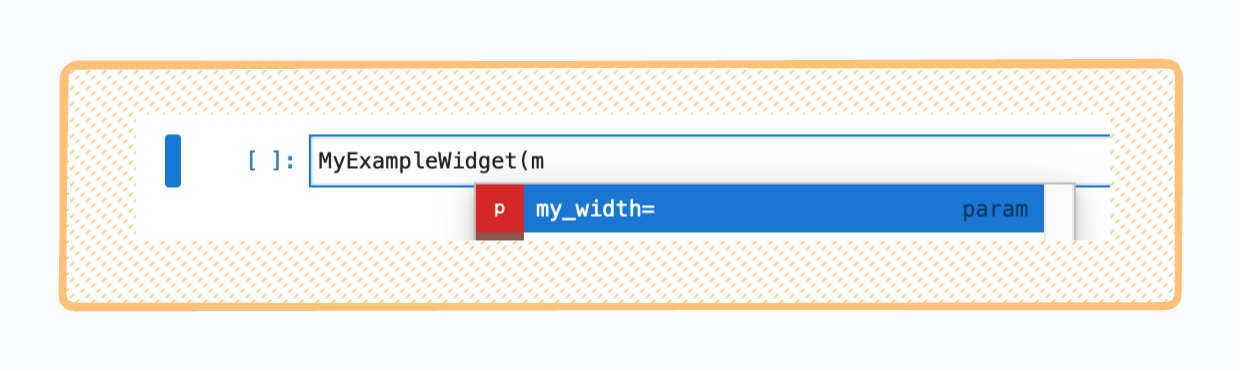

Now we want to **print a message at class initiliation** that says "Button was initilized with width 300px!"  
That is possible, but not very streight forward, so feel free to skip this example.  

In [36]:
import ipyreact
from traitlets import Any, Unicode, Int, observe, signature_has_traits

# 🪄🪄🪄 this is an advanced example, feel free to skip 🪄🪄🪄

@signature_has_traits
class MyExampleWidget(ipyreact.ReactWidget):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.print_welcome_message()

    def print_welcome_message(self):
        print(f"Button was initilized with width of {self.my_width}px ")
            
    my_width = Int(23).tag(sync=True)

    _esm = """
    import * as React from "react";

    export default function Square({my_width}) {
        return <button style={{
        position: "relative",
        width: my_width,
        height: 30,
      }}
        > Width of {my_width} px  </button> 
        };"""
MyExampleWidget(my_width = 200)

Button was initilized with width of 200px 


MyExampleWidget(my_width=200)